In [ ]:
##Importing the necessary libraries for this project

## importing open cv
import cv2 as cv

## importing numpy
import numpy as np
import matplotlib.pyplot as plt


#tensorflow for our dataset, layers and models
from tensorflow.keras import datasets, layers, models

In [12]:
from tensorflow.keras.models import load_model

In [3]:
## loading our dataset from keras 
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

In [4]:
## Scaling down training and testing images from 0-255 to 0-1
training_images, testing_images = training_images/255, testing_images/255

In [5]:
## labelling the various classes
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog','frog','horse', 'ship', 'truck']

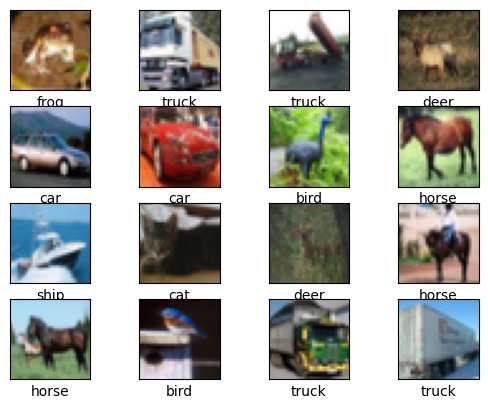

In [ ]:
##showing the target images

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

plt.show()


In [11]:

## Modelling
## Define the model architecture
model = models.Sequential()  # Initialize a sequential model (a linear stack of layers)

# Add the first convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
# This layer applies 32 filters of size 3x3 to the input image (32x32 pixels with 3 color channels).
# The ReLU activation function introduces non-linearity, helping the model learn complex patterns.

# Add a max-pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Max-pooling reduces the spatial dimensions (width and height) of the input by taking the maximum value
# in each 2x2 window. This helps reduce computational complexity and prevents overfitting.

# Add a second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
# This layer applies 64 filters of size 3x3 to the output of the previous layer.
# It captures more complex features, such as shapes and textures.

#  Add another max-pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Further reduces the spatial dimensions, focusing on the most important features.

#  Add a third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
# This layer applies 64 filters of size 3x3 to capture even more complex and abstract features.

# Flatten the output from the convolutional layers
model.add(layers.Flatten())
# Converts the 3D output from the convolutional layers into a 1D vector,
# preparing it for input into fully connected (dense) layers.

# Add a fully connected (dense) layer
model.add(layers.Dense(64, activation='relu'))
# This layer consists of 64 neurons and applies the ReLU activation function.
# It helps the model learn high-level features and relationships in the data.

# Add the output layer
model.add(layers.Dense(10, activation='softmax'))
# The output layer has 10 neurons (for 10 classes) and uses the softmax activation function
# to produce a probability distribution over the classes.

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Configures the model for training:
# - Optimizer: 'adam' (adaptive moment estimation) for efficient gradient descent.
# - Loss function: 'sparse_categorical_crossentropy' for multi-class classification.
# - Metrics: 'accuracy' to monitor the proportion of correctly classified images.

# Train the model
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))
# Trains the model on the training data for 10 epochs (full passes through the dataset).
# The model's performance is evaluated on the validation data after each epoch.


## evaluation of the model
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"loss:{loss}")
print(f"Accuracy: {accuracy}")

## save the model to reuse 
model.save("image_classifier.keras")

#model.load("")

c:\Documentpc\Image Classification CNN using tensorflow\imageclassenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3545 - loss: 1.7428 - val_accuracy: 0.5548 - val_loss: 1.2433
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5820 - loss: 1.1743 - val_accuracy: 0.6290 - val_loss: 1.0426
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6433 - loss: 1.0138 - val_accuracy: 0.6540 - val_loss: 0.9993
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6829 - loss: 0.9028 - val_accuracy: 0.6589 - val_loss: 0.9743
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7143 - loss: 0.8148 - val_accuracy: 0.6905 - val_loss: 0.8920
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7391 - loss: 0.7374 - val_accuracy: 0.7027 - val_loss: 0.8612
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7594 - loss: 0.6869 - val_accuracy: 0.7124 - val_loss: 0.8447
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7725 - loss: 0

In [ ]:
## Loading the saved model to reuse
model = load_model("Image_classifier.keras")

In [30]:
## Loading the our images to make predictions
img = cv.imread("truck.jpg")

## Converting our image from BGR to RGB(Since our training was done using RGB)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

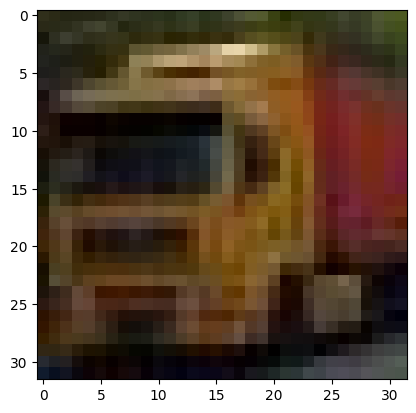

In [31]:
## plot of our image
plt.imshow(img, cmap=plt.cm.binary)

In [32]:
## Prediction
##NB divide the image by 255 to scale it to 0-1 as we did on the training data
prediction = model.predict(np.array([img])/255)

## Use argmax to select the index of the neuron with the highest probability
index = np.argmax([prediction])
print(f"Prediction is : {class_names[index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction is : truck
